### [Data info](https://data.stanford.edu/hcmst)

### Data notes
Wave I, the main survey, was fielded between February 21 and April 2, 2009. Wave 2 was fielded March 12, 2010 to June 8, 2010. Wave 3 was fielded March 22, 2011 to August 29, 2011. Wave 4 was fielded between March and November of 2013. Wave 5 was fielded between November, 2014 and March, 2015.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=1000

# Load raw data

In [28]:
df = pd.read_stata('/gh/data/hcmst/1.dta')
# df2 = pd.read_stata('/gh/data/hcmst/2.dta')
# df3 = pd.read_stata('/gh/data/hcmst/3.dta')
# df = df1.merge(df2, on='caseid_new')
# df = df.merge(df3, on='caseid_new')
df.head(2)

,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,pphouseholdsize,pphouse,ppincimp,hhinc,ppmarit,ppmsacat,ppreg4,ppreg9,pprent,ppt01,ppt1317,ppt18ov,ppt25,ppt612,children_in_hh,ppwork,ppnet,ppq14arace,pphispan,pprace_white,pprace_black,pprace_nativeamerican,pprace_asianindian,pprace_chinese,pprace_filipino,pprace_japanese,pprace_korean,pprace_vietnamese,pprace_otherasian,pprace_hawaiian,pprace_guamanian,pprace_samoan,pprace_otherpacificislander,pprace_someotherrace,papglb_friend,pppartyid3,papevangelical,papreligion,ppppcmdate_yrmo,pppadate_yrmo,pphhcomp11_member2_age,pphhcomp11_member3_age,pphhcomp11_member4_age,pphhcomp11_member5_age,pphhcomp11_member6_age,pphhcomp11_member7_age,pphhcomp11_member8_age,pphhcomp11_member9_age,pphhcomp11_member10_age,pphhcomp11_member11_age,pphhcomp11_member12_age,pphhcomp11_member13_age,pphhcomp11_member14_age,pphhcomp11_member15_age,pphhcomp11_member2_gender,pphhcomp11_member3_gender,pphhcomp11_member4_gender,pphhcomp11_member5_gender,pphhcomp11_member6_gender,pphhcomp11_member7_gender,pphhcomp11_member8_gender,pphhcomp11_member9_gender,pphhcomp11_member10_gender,pphhcomp11_member11_gender,pphhcomp11_member12_gender,pphhcomp11_member13_gender,pphhcomp11_member14_gender,pphhcomp11_member15_gender,pphhcomp11_member2_relationship,pphhcomp11_member3_relationship,pphhcomp11_member4_relationship,pphhcomp11_member5_relationship,pphhcomp11_member6_relationship,pphhcomp11_member7_relationship,pphhcomp11_member8_relationship,pphhcomp11_member9_relationship,pphhcomp11_member10_relationship,pphhcomp11_member11_relationship,pphhcomp11_member12_relationship,pphhcomp11_member13_relationship,pphhcomp11_member14_relationship,pphhcomp11_member15_relationship,irb_consent,weight3,weight4,weight5,weight6,weight7,weight_couples_coresident,HCMST_main_interview_yrmo,duration,qflag,glbstatus,papglb_status,recsource,s1,s1a,s2,q3_codes,q4,q5,q6a,q6b,q7a,q7b,q8a,q8b,q9,q10,q11,q12,q13a,q13b,q14,q15a1_compressed,q16,q17a,q17b,q17c,q17d,gender_attraction,q18a_1,q18a_2,q18a_3,q18a_refused,q18b_codes,q18c_codes,q19,q20,q21a,q21a_refusal,q21b,q21b_refusal,q21c,q21c_refusal,q21d,q21d_refusal,q21e,q21e_refusal,q22,q23,q24_codes,q25,q26,q27,q28,q29,q30,q31_1,q31_2,q31_3,q31_4,q31_5,q31_6,q31_7,q31_8,q31_9,q31_other_text_entered,q32,q33_1,q33_2,q33_3,q33_4,q33_5,q33_6,q33_7,q33_other_text_entered,q34,q35_codes,q35_text_entered,q24_met_online,summary_q24_total,q24_R_cowork,q24_R_friend,q24_R_family,q24_R_sig_other,q24_R_neighbor,q24_P_cowork,q24_P_friend,q24_P_family,q24_P_sig_other,q24_P_neighbor,q24_btwn_I_cowork,q24_btwn_I_friend,q24_btwn_I_family,q24_btwn_I_sig_other,q24_btwn_I_neighbor,q24_school,q24_college,q24_military,q24_church,q24_vol_org,q24_customer,q24_bar_restaurant,q24_internet_dating,q24_internet_social_networking,q24_internet_game,q24_internet_chat,q24_internet_community,q24_internet_other,q24_public,q24_private_party,q24_blind_date,q24_vacation,q24_singles_service_non_internet,q24_business_trip,q24_work_neighbor,q24_fam_sister_active,q24_fam_brother_active,q24_fam_mother_active,q24_fam_father_active,q24_fam_other_active,q24_fam_cousins_active,q24_fam_aunt_niece_active,q24_fam_uncle_nephew_active,q24_fam_grandmother_active,q24_fam_grandfather_active,q24_fam_sister_passive,q24_fam_brother_passive,q24_fam_mother_passive,q24_fam_father_passive,q24_fam_other_passive,q24_fam_cousins_passive,q24_fam_aunt_niece_passive,q24_fam_uncle_nephew_passive,q24_fam_grandmother_passive,q24_fam_grandfather_passive,q24_fam_female,q24_fam_male,distancemoved_10mi,marrynotreally,marrycountry,civilnotreally,partner_deceased,partner_religion_reclassified,partner_religion_child_reclass,own_religion_child_reclass,q32_internet,how_met_online,either_internet,either_internet_adjusted,same_sex_couple,potential_partner_gender_recodes,alt_partner_gender,how_long_ago_first_met,how_long_ago_first_romantic,how_long_ago_first_cohab,how_long_ago_first_met_cat,how_long_relationship,respondent_race,partner_rac

# Select and rename columns

In [29]:
rename_cols_dict = {'ppage': 'age', 'ppeducat': 'education',
                   'ppethm': 'race', 'ppgender': 'sex',
                   'pphouseholdsize': 'household_size', 'pphouse': 'house_type',
                   'hhinc': 'income', 'ppmarit': 'marital_status',
                   'ppmsacat': 'in_metro', 'ppreg4': 'usa_region',
                   'pprent': 'house_payment', 'children_in_hh': 'N_child',
                   'ppwork': 'work', 'ppnet': 'has_internet',
                   'papglb_friend': 'has_gay_friendsfam', 'pppartyid3': 'politics',
                   'papreligion': 'religion', 'qflag': 'in_relationship',
                   'q9': 'partner_age', 'duration': 'N_minutes_survey',
                   'glbstatus': 'is_lgb', 's1': 'is_married',
                   'partner_race': 'partner_race', 'q7b': 'partner_religion',
                   'q10': 'partner_education', 'US_raised': 'USA_raised',
                   'q17a': 'N_marriages', 'q17b': 'N_marriages2', 'coresident': 'cohabit',
                   'q21a': 'age_first_met', 'q21b': 'age_relationship_begin',
                   'q21d': 'age_married', 'q23': 'relative_income',
                   'q25': 'same_high_school', 'q26': 'same_college',
                   'q27': 'same_hometown', 'age_difference': 'age_difference',
                   'q34':'relationship_quality',
                   'q24_met_online': 'met_online', 'met_through_friends': 'met_friends',
                   'met_through_family': 'met_family', 'met_through_as_coworkers': 'met_work'}

df = df[list(rename_cols_dict.keys())]
df.rename(columns=rename_cols_dict, inplace=True)

# Process number of marriages
df['N_marriages'] = df['N_marriages'].astype(str).replace({'nan':''}) + df['N_marriages2'].astype(str).replace({'nan':''})
df.drop('N_marriages2', axis=1, inplace=True)
df['N_marriages'] = df['N_marriages'].replace({'':np.nan, 'once (this is my first marriage)': 'once', 'refused':np.nan})
df['N_marriages'] = df['N_marriages'].astype('category')

In [30]:
# Clean entries to make simpler
df['in_metro'] = df['in_metro']=='metro'
df['relationship_excellent'] = df['relationship_quality'] == 'excellent'

df['house_payment'].replace({'owned or being bought by you or someone in your household': 'owned',
                         'rented for cash': 'rent',
                         'occupied without payment of cash rent': 'free'}, inplace=True)
df['race'].replace({'white, non-hispanic': 'white',
                '2+ races, non-hispanic': 'other, non-hispanic',
                'black, non-hispanic': 'black'}, inplace=True)
df['house_type'].replace({'a one-family house detached from any other house': 'house',
                'a building with 2 or more apartments': 'apartment',
                'a one-family house attached to one or more houses': 'house',
                'a mobile home': 'mobile',
                'boat, rv, van, etc.': 'mobile'}, inplace=True)
df['is_not_working'] = df['work'].str.contains('not working')
df['has_internet'] = df['has_internet'] == 'yes'
df['has_gay_friends'] = np.logical_or(df['has_gay_friendsfam']=='yes, friends', df['has_gay_friendsfam']=='yes, both')
df['has_gay_family'] = np.logical_or(df['has_gay_friendsfam']=='yes, relatives', df['has_gay_friendsfam']=='yes, both')
df['religion_is_christian'] = df['religion'].isin(['protestant (e.g., methodist, lutheran, presbyterian, episcopal)',
                                                   'catholic', 'baptist-any denomination', 'other christian', 'pentecostal', 'mormon', 'eastern orthodox'])
df['religion_is_none'] = df['religion'].isin(['none'])
df['in_relationship'] = df['in_relationship']=='partnered'
df['is_lgb'] = df['is_lgb']=='glb'
df['is_married'] = df['is_married']=='yes, i am married'
df['partner_race'].replace({'NH white': 'white', ' NH black': 'black',
                            ' NH Asian Pac Islander':'other', ' NH Other': 'other', ' NH Amer Indian': 'other'}, inplace=True)
df['partner_religion_is_christian'] = df['partner_religion'].isin(['protestant (e.g., methodist, lutheran, presbyterian, episcopal)',
                                                   'catholic', 'baptist-any denomination', 'other christian', 'pentecostal', 'mormon', 'eastern orthodox'])
df['partner_religion_is_none'] = df['partner_religion'].isin(['none'])
df['partner_education'] = df['partner_education'].map({'hs graduate or ged': 'high school',
                                                       'some college, no degree': 'some college',
                                                       "associate degree": "some college",
                                                       "bachelor's degree": "bachelor's degree or higher",
                                                       "master's degree": "bachelor's degree or higher",
                                                       "professional or doctorate degree": "bachelor's degree or higher"})
df['partner_education'].fillna('less than high school', inplace=True)
df['USA_raised'] = df['USA_raised']=='raised in US'
df['N_marriages'] = df['N_marriages'].map({'never married': '0', 'once': '1', 'twice': '2', 'three times': '3+', 'four or more times':'3+'})
df['relative_income'].replace({'i earned more': 'more', 'partner earned more': 'less',
                               'we earned about the same amount': 'same', 'refused': np.nan}, inplace=True)
df['same_high_school'] = df['same_high_school']=='same high school'
df['same_college'] = df['same_college']=='attended same college or university'
df['same_hometown'] = df['same_hometown']=='yes'
df['cohabit'] = df['cohabit']=='yes'
df['met_online'] = df['met_online']=='met online'
df['met_friends'] = df['met_friends']=='meet through friends'
df['met_family'] = df['met_family']=='met through family'
df['met_work'] = df['met_family']==1

df['age'] = df['age'].astype(int)
for c in df.columns:
    if str(type(df[c])) == 'object':
        df[c] = df[c].astype('category')

In [53]:
df.head()

,age,education,race,sex,household_size,house_type,income,marital_status,in_metro,usa_region,house_payment,N_child,work,has_internet,has_gay_friendsfam,politics,religion,in_relationship,partner_age,N_minutes_survey,is_lgb,is_married,partner_race,partner_religion,partner_education,USA_raised,N_marriages,cohabit,age_first_met,age_relationship_begin,age_married,relative_income,same_high_school,same_college,same_hometown,age_difference,relationship_quality,met_online,met_friends,met_family,met_work,relationship_excellent,is_not_working,has_gay_friends,has_gay_family,religion_is_christian,religion_is_none,partner_religion_is_christian,partner_religion_is_none
0,52,bachelor's degree or higher,hispanic,female,2,apartment,22250.0,living with partner,True,midwest,rent,0,working - as a paid employee,True,"yes, friends",democrat,catholic,True,48.0,20,True,False,white,"protestant (e.g. methodist, lutheran, presbyte...",some college,True,1,False,45.0,45.0,NaN,less,False,False,False,4.0,good,True,False,False,False,False,False,True,False,True,False,False,False
1,28,bachelor's degree or higher,white,female,2,apartment,45000.0,living with partner,True,west,rent,0,working - as a paid employee,True,"yes, both",democrat,jewish,True,30.0,13,True,True,white,none,bachelor's degree or higher,True,1,False,19.0,20.0,23.0,more,False,True,False,2.0,good,False,True,False,False,False,False,True,True,False,False,False,True
2,49,high school,black,female,4,apartment,37250.0,never married,True,south,rent,1,working - as a paid employee,True,"yes, both",democrat,baptist-any denomination,False,NaN,0,False,False,NaN,NaN,less than high school,False,NaN,False,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,False,False,False,False,False,False,True,True,True,False,False,False
3,31,some college,white,male,1,apartment,45000.0,never married,True,south,owned,0,working - as a paid employee,True,"yes, both",democrat,"other non-christian, please specify:",True,40.0,9,True,False,white,"other non-christian, please specify",high school,True,0,False,23.0,23.0,NaN,more,False,False,False,9.0,good,True,True,False,False,False,False,True,True,False,False,False,False
4,35,high school,white,male,2,house,45000.0,never married,True,south,owned,0,working - self-employed,True,"yes, friends",democrat,other christian,False,NaN,1,True,False,NaN,NaN,less than high school,False,NaN,False,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,False,False,False,False,False,False,True,False,True,False,False,False


In [58]:
df.to_csv('/gh/data/hcmst/1_cleaned.csv')

# Distributions

In [54]:
for c in df.columns:
    print(df[c].value_counts())

56    107
44    104
29    103
43     96
50     96
49     94
55     92
28     91
41     90
54     90
51     86
38     86
39     86
59     84
53     83
58     82
45     78
42     78
48     77
20     76
27     75
40     74
46     73
57     71
36     71
62     68
52     67
47     66
21     65
32     64
     ... 
66     48
69     41
68     40
73     38
70     36
19     33
76     33
71     33
74     30
72     29
78     29
75     25
79     25
77     23
82     22
80     21
83     17
85     13
84     12
81     11
89      6
88      6
86      4
92      3
90      3
91      2
87      2
93      1
94      1
95      1
Name: age, Length: 77, dtype: int64
bachelor's degree or higher    1407
some college                   1210
high school                     987
less than high school           398
Name: education, dtype: int64
white                  3007
hispanic                387
black                   321
other, non-hispanic     287
Name: race, dtype: int64
female    2035
male      1967
Name: sex, dt

/Users/scott/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


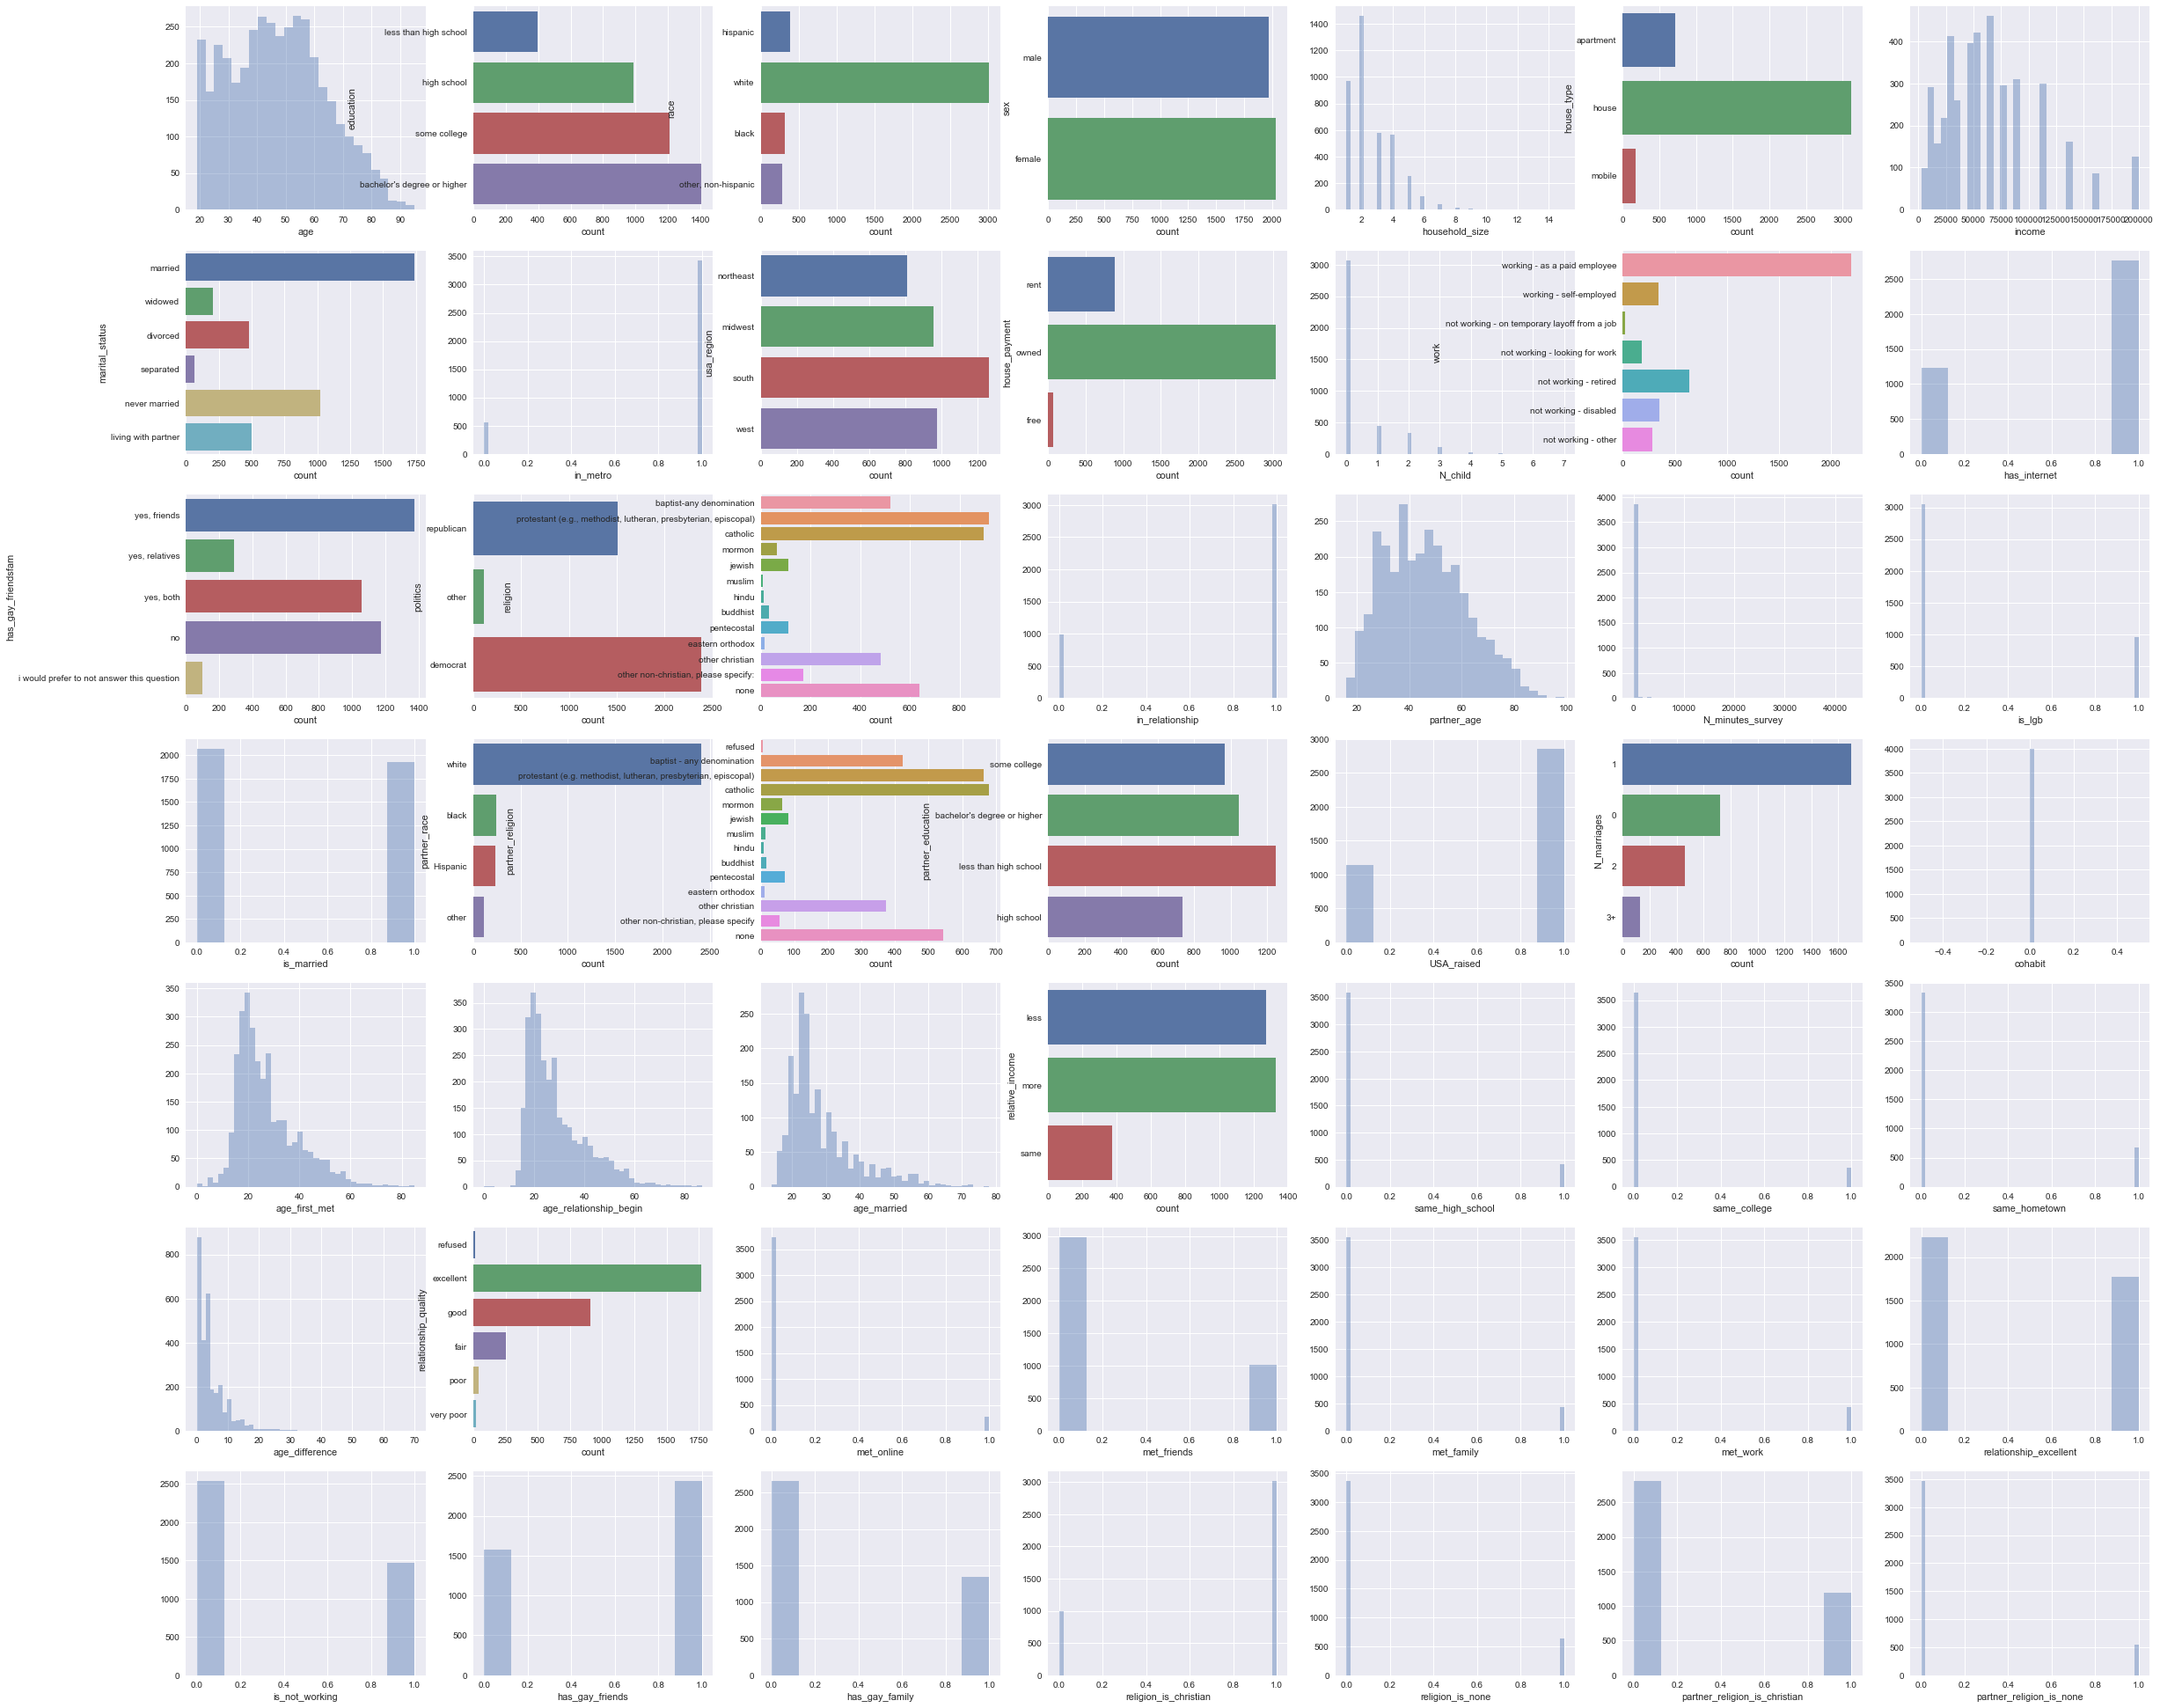

In [55]:
# Countplot if categorical; distplot if numeric
from pandas.api.types import is_numeric_dtype

plt.figure(figsize=(40,40))
for i, c in enumerate(df.columns):
    plt.subplot(7,7,i+1)
    if is_numeric_dtype(df[c]):
        sns.distplot(df[c].dropna(), kde=False)
    else:
        sns.countplot(y=c, data=df)
plt.savefig('temp.png')

/Users/scott/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


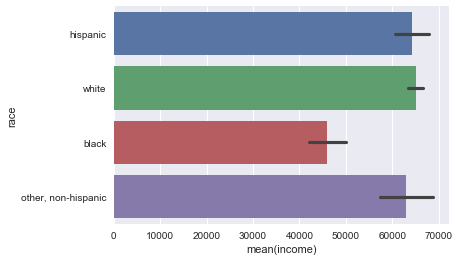

In [57]:
sns.barplot(x='income', y='race', data=df)